# Quizz 2. Mínimos Cuadrados

**Objetivo**.

* Entender en qué consiste el ajuste de rectas por el método de mínimos cuadrados.
* Realizar una implementación de las matemáticas requeridas en este método.
* Probar la implementación con datos generados de manera sintética.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/">Mínimos cuadrados by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

  **Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

# Introducción.

El **método de mínimos cuadrados** se utiliza para ajustar rectas a series de datos presentados en la forma $(x, y)$ como en la siguiente tabla:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

Este tipo de datos pueden provenir de diferentes fuentes como estudios geofísicos en campo, estudios experimentales en laboratorio, obtención de datos mediante encuestas, observación de fenómenos naturales, etc. La idea es estudiar como una variable depende de la otra.

Una posibilidad es que la variación sea lineal es decir: $y = m x + b$.

Sin embargo, en la mayoría de los casos no es posible obtener una recta exacta que pase por todos los puntos.

Para ello, el método de mínimos cuadrados nos proporciona con una metodología para obtener la mejor recta que represente a todos los puntos del conjunto de datos. 

# Conjuntos de datos.

Para esta actividad vamos a generar de manera sintética 4 conjuntos de datos. Usaremos la función `np.random.rand()` de numpy.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from macti.evaluation import *

In [41]:
quizz = Quizz('q2', 'HeCompA', 'local')

In [42]:
# Total de datos de cada conjunto
N = 20

# Fijamos la semilla para obtener los mismos valores siempre
np.random.seed(0)

# Conjunto 0
x0 = np.linspace(0,10,N) 
y0 = x0 + np.random.randn(N)*2

# Conjunto 1
x1 = np.random.randn(len(x0))*10
y1 = np.random.randn(len(x0))*10

# Conjunto 2
x2 = np.arange(0,N)*100
y2 = -x2 + np.random.randn(N)*500

# Conjunto 3
x3 = np.array([i for i in range(N)])
y3 = np.random.rand(N)*0.5-0.5

In [43]:
print('\nArreglo x0 :\n{}'.format(x0))
print('Arreglo y0 :\n{}'.format(y0))

print('\nArreglo x1 :\n{}'.format(x1))
print('Arreglo y1 :\n{}'.format(y1))

print('\nArreglo x2 :\n{}'.format(x2))
print('Arreglo y2 :\n{}'.format(y2))

print('\nArreglo x3 :\n{}'.format(x3))
print('Arreglo y3 :\n{}'.format(y3))


Arreglo x0 :
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
Arreglo y0 :
[ 3.52810469  1.32663021  3.01010755  6.06073377  5.84037914  0.67702319
  5.05807157  3.38149611  4.00408861  5.55803911  5.55124504  8.6980207
  7.83786492  7.0854553   8.25614752  8.5620855  11.40921078  8.53705189
 10.09981961  8.29180852]

Arreglo x1 :
[-25.52989816   6.53618595   8.64436199  -7.4216502   22.69754624
 -14.54365675   0.45758517  -1.8718385   15.32779214  14.6935877
   1.54947426   3.7816252   -8.87785748 -19.80796468  -3.47912149
   1.56348969  12.30290681  12.02379849  -3.87326817  -3.02302751]
Arreglo y1 :
[-10.48552965 -14.20017937 -17.06270191  19.50775395  -5.09652182
  -4.38074302 -12.5279536    7.77490356 -16.13897848  -2.1274028
  -8.95466561   3.86902498  -5.10805138 -11.80632184  -0.28182

# Análisis exploratorio.

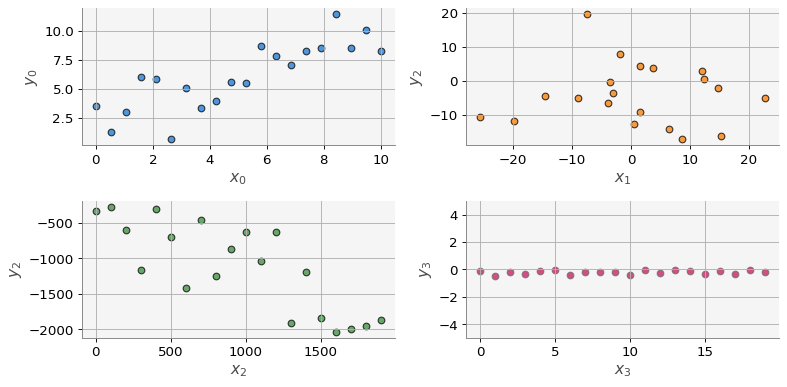

In [44]:
plt.figure(figsize=(10,5))

ax0 = plt.subplot(221)
ax0.scatter(x0, y0, fc = 'C0', ec='k', alpha=0.75)
ax0.set_xlabel('$x_0$')
ax0.set_ylabel('$y_0$')
ax0.grid()

ax1 = plt.subplot(222)
ax1.scatter(x1, y1, fc = 'C1', ec='k', alpha=0.75)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$y_2$')
ax1.grid()

ax2 = plt.subplot(223)
ax2.scatter(x2, y2, fc = 'C2', ec='k', alpha=0.75)
ax2.set_xlabel('$x_2$')
ax2.set_ylabel('$y_2$')
ax2.grid()

ax3 = plt.subplot(224)
ax3.scatter(x3, y3, fc = 'C3', ec='dimgrey', alpha=0.75)
ax3.set_xlabel('$x_3$')
ax3.set_ylabel('$y_3$')
ax3.set_ylim(-5,5)
ax3.grid()

plt.tight_layout()
plt.show()

# Valores de $m$ y $b$ óptimos.

Los valores de la pendiente y de la ordenada al origen de la recta que mejor aproxima a un conjunto de datos están dados por las siguientes fórmulas:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{1}
$$

$$
b = \bar{y} - m \bar{x} \tag{2}
$$

donde $\bar{y} = \dfrac{1}{N}\sum_{i=1}^{N} y_i$  y $\bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i$ representan el valor medio de los datos.

Podemos usar los conjuntos de datos definidos antes para calcular $m$ y $b$ y con ello obtener la recta que ajusta los datos. 

<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black">Calcular la media del conjunto de datos $x_0$, $y_0$. Almacenar las medias en las variables `X` y `Y`.</font>

</div>

In [45]:
### BEGIN SOLUTION

### FileAnswer definition
# Se crea un objeto para guardar las respuestas, solo una vez.
file_answer = FileAnswer() 
#file_answer.verb = 0

# Media de x
X = 0.0
for xi in x0:
    X += xi
X /= N

# Media de y
Y = 0.0
for yi in y0:
    Y += yi
Y /= N

file_answer.write('1', X, 'Revisa la definición de la media y tu implementación para el cálculo de la media de x')
file_answer.write('2', Y, 'Revisa la definición de la media y tu implementación para el cálculo de la media de y')

# END SOLUTION

print('Media de x: {}'.format(X))
print('Media de y: {}'.format(Y))

Media de x: 5.0
Media de y: 6.138669185891269


In [46]:
quizz.eval_numeric('1', X)
quizz.eval_numeric('2', Y)

----------------------------------------
1 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
2 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## **Ejercicio 2.**

<font color="Black">Calcular la pendiente $m$ del conjunto de datos $x_0$, $y_0$ usando la fórmula $(1)$. Almacenar la pendiente en la variable `m`.</font>

</div>

In [47]:
### BEGIN SOLUTION
# Cálculo de m
Sxx = 0
Sxy = 0
for xi, yi in zip(x0, y0):
    Sxy += xi * (yi - Y)
    Sxx += xi * (xi - X)
m = Sxy / Sxx

file_answer.write('3', m, 'Revisa la fórmula para el cálculo de la pendiente y tu implementación')

# END SOLUTION

print('Pendiente m: {}'.format(m))

Pendiente m: 0.7725548289646033


In [48]:
quizz.eval_numeric('3', m)

----------------------------------------
3 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## **Ejercicio 3.**

<font color="Black">Calcular la ordenada al origen $b$ del conjunto de datos $x_0$, $y_0$ usando la fórmula $(2)$. Almacenar la pendiente en la variable `b`.</font>

</div>

In [49]:
# Cálculo de b
# b = ...
### BEGIN SOLUTION
# Cálculo de b
b = Y - m * X

file_answer.write('4', b, 'Revisa la fórmula para el cálculo de la ordenada al origen y tu implementación')

### END SOLUTION

print('Ordenada al origen b: {}'.format(b))

Ordenada al origen b: 2.2758950410682526


In [50]:
quizz.eval_numeric('4', b)

----------------------------------------
4 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## **Ejercicio 4.**

<font color="Black">

Construir una recta usando los valores de $m$ y $b$ calculados en los ejercicios anteriores como sigue:
* Construir un arreglo para $x$, de nombre `xr0`, usando alguna función de `numpy` (**el arreglo debe ser de 10 elementos**):
```python
xr0 = np. ...
```
* Evaluar $y = mx + b$ usando el arreglo `xr0` para generar el arreglo `yr0`:
```python
yr0 = ...
```
</div>

In [51]:
# Construcción de las rectas
# xr0 = np....
# yr0 = ...

### BEGIN SOLUTION
# Construcción de la recta
xr0 = np.linspace(x0.min(), x0.max(), 10)
yr0 = m * xr0 + b

file_answer.write('5', xr0, 'Recuerda que el arreglo debe tener 10 elementos, checa tu implementación')
file_answer.write('6', yr0, 'Solo tienes que implementar la fórmula de la recta usando m, xr0 y b')

### END SOLUTION

print(xr0)
print(yr0)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 2.27589504  3.1342893   3.99268355  4.8510778   5.70947206  6.56786631
  7.42626057  8.28465482  9.14304908 10.00144333]


In [52]:
quizz.eval_numeric('5', xr0)
quizz.eval_numeric('6', yr0)

----------------------------------------
5 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
6 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-info">

Si realizaste correctamente los ejercicios $1-4$, entonces la siguiente celda de código graficará los cuatro conjuntos de datos y en la primera gráfica se verá la línea recta que construiste.

**NOTA**. En esta graficación estamos usando la biblioteca `macti.visual`.

</div>

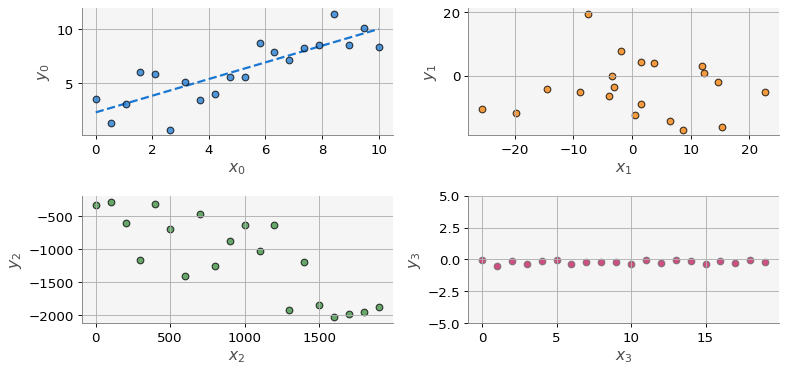

In [53]:
import macti.visual as mvis

axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75, zorder=5)

vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()

<div class="alert alert-success">

## **Ejercicio 5.**

<font color="Black">Construir la función `media(x)` para calcular la media de un conjunto de datos. La función debe recibir como entrada el arreglo con los datos, `x`, y regresa la media de los mismos. Probar la función para los datos `x0` y `y0` como sigue:
```python
X0 = media(x0)
Y0 = media(y0)
```
</font>

</div>

In [54]:
# Función media()
# def media (x) : 
# ...

### BEGIN SOLUTION
def media(x):
    xm = 0.0
    for xi in x:
        xm += xi
    return xm / N

X0 = media(x0)
Y0 = media(y0)

file_answer.write('7', X0, 'Revisa la definición de la media y la implementación de la función media(x)')
file_answer.write('8', Y0, 'Revisa la definición de la media y la implementación de la función media(x)')

### END SOLUTION

print('Media de x0 : {}'.format(X0))
print('Media de y0 : {}'.format(Y0))

Media de x0 : 5.0
Media de y0 : 6.138669185891269


In [55]:
quizz.eval_numeric('7', X0)
quizz.eval_numeric('8', Y0)

----------------------------------------
7 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
8 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## **Ejercicio 6.**

<font color="Black">
    
Construir la función `mincua(x, y)` para calcular $m$ y $b$ de un conjunto de datos. La función recibe como entrada los arreglos de datos, `x, y`, y regresa `m` y `b`. Calcular `m` y `b` para los conjuntos de datos: 

* ($x_1$, $y_1$), almacenar $m$ y $b$ en las variables `m1` y `b1` respectivamente.
* ($x_2$, $y_2$), almacenar $m$ y $b$ en las variables `m2` y `b2` respectivamente.
* ($x_3$, $y_3$), almacenar $m$ y $b$ en las variables `m3` y `b3` respectivamente.

</font>

</div>

In [56]:
# Función mincua()
# def mincua (x) : 
# ...
# 

### BEGIN SOLUTION
def mincua(x, y):
    # Cálculo de la media
    X = media(x)
    Y = media(y)
    
    # Cálculo de m
    Sxx = 0
    Sxy = 0
    for xi, yi in zip(x, y):
        Sxy += xi * (yi - Y)
        Sxx += xi * (xi - X)
    m = Sxy / Sxx

    # Cálculo de b
    b = Y - m * X

    return m, b
### END SOLUTION

In [57]:
# Cálculo de m y b
# m1, b1 = ...
# ...

### BEGIN SOLUTION
m1, b1 = mincua(x1, y1)
m2, b2 = mincua(x2, y2)
m3, b3 = mincua(x3, y3)

file_answer.write('9' , [m1, b1], 'Checa que ejecutaste la función mincua(x,y) con los datos correctos (x1, y1). Checa también tu implementación')
file_answer.write('10', [m2, b2], 'Checa que ejecutaste la función mincua(x,y) con los datos correctos (x2, y2). Checa también tu implementación')
file_answer.write('11', [m3, b3], 'Checa que ejecutaste la función mincua(x,y) con los datos correctos (x3, y3). Checa también tu implementación')

### END SOLUTION

print('m1 = {}, \t b1 = {}'.format(m1, b1))
print('m2 = {}, \t b2 = {}'.format(m2, b2))
print('m3 = {}, \t b3 = {}'.format(m3, b3))

m1 = -0.02002336877662938, 	 b1 = -3.9396674988126574
m2 = -0.86095919430528, 	 b2 = -308.1742770138992
m3 = 0.003809973693633117, 	 b3 = -0.24601956385565651


In [58]:
quizz.eval_numeric('9', [m1, b1])
quizz.eval_numeric('10', [m2, b2])
quizz.eval_numeric('11', [m3, b3])

----------------------------------------
9 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
10 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
11 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## **Ejercicio 7.**

<font color="Black">
    
Construir las rectas de cada conjunto de datos como sigue:

* Usando `m1` y `b1` construir los arreglos de coordenadas `xr1` y `yr1`.
* Usando `m2` y `b2` construir los arreglos de coordenadas `xr2` y `yr2`.
* Usando `m3` y `b3` construir los arreglos de coordenadas `xr3` y `yr3`.

</font>

</div>

In [59]:
# Construcción de las rectas
# xr1 = np.linspace( ... )
# yr1 = ...
# ...
### BEGIN SOLUTION
# Construcción de las rectas
xr1 = np.linspace(x1.min(), x1.max(), 10)
yr1 = m1 * xr1 + b1

xr2 = np.linspace(x2.min(), x2.max(), 10)
yr2 = m2 * xr2 + b2

xr3 = np.linspace(x3.min(), x3.max(), 10)
yr3 = m3 * xr3 + b3

file_answer.write('12', xr1, 'El arreglo xr1 no está bien construido.')
file_answer.write('13', yr1, 'El arreglo yr1 no está bien evaluado. Checa la fórmula de la recta.')
file_answer.write('14', xr2, 'El arreglo xr2 no está bien construido.')
file_answer.write('15', yr2, 'El arreglo yr2 no está bien evaluado. Checa la fórmula de la recta.')
file_answer.write('16', xr3, 'El arreglo xr3 no está bien construido.')
file_answer.write('17', yr3, 'El arreglo yr3 no está bien evaluado. Checa la fórmula de la recta.')

file_answer.to_file('q2')
### END SOLUTION

El directorio :/home/jovyan/HeCompA/.ans/03_AnalisisNumerico/ ya existe
Respuestas y retroalimentación almacenadas.


In [60]:
print(xr1, yr1, sep = '\n', end='\n\n')
print(xr2, yr2, sep = '\n', end='\n\n')
print(xr3, yr3, sep = '\n', end='\n\n')

[-25.52989816 -20.17129323 -14.81268829  -9.45408336  -4.09547843
   1.26312651   6.62173144  11.98033637  17.33894131  22.69754624]
[-3.42847293 -3.53577026 -3.64306758 -3.7503649  -3.85766222 -3.96495955
 -4.07225687 -4.17955419 -4.28685151 -4.39414884]

[   0.          211.11111111  422.22222222  633.33333333  844.44444444
 1055.55555556 1266.66666667 1477.77777778 1688.88888889 1900.        ]
[ -308.17427701  -489.93232915  -671.69038128  -853.44843341
 -1035.20648554 -1216.96453767 -1398.7225898  -1580.48064193
 -1762.23869406 -1943.99674619]

[ 0.          2.11111111  4.22222222  6.33333333  8.44444444 10.55555556
 12.66666667 14.77777778 16.88888889 19.        ]
[-0.24601956 -0.23797629 -0.22993301 -0.22188973 -0.21384645 -0.20580317
 -0.1977599  -0.18971662 -0.18167334 -0.17363006]



In [61]:
quizz.eval_numeric('12', xr1)
quizz.eval_numeric('13', yr1)
quizz.eval_numeric('14', xr2)
quizz.eval_numeric('15', yr2)
quizz.eval_numeric('16', xr3)
quizz.eval_numeric('17', yr3)

----------------------------------------
12 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
13 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
14 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
15 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
16 | Tu resultado es correcto.
----------------------------------------
----------------------------------------
17 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-info">

Si caculaste todo correctamente, entonces la siguiente celda de código graficará los cuatro conjuntos de datos junto con las líneas rectas que construiste.

</div>

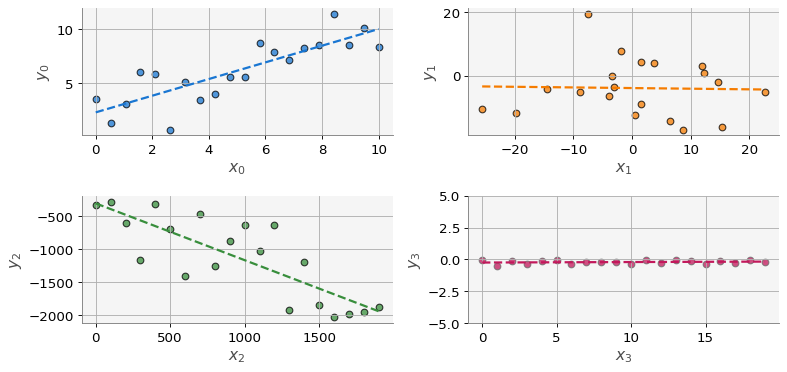

In [62]:
axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75)

vis.plot(2, xr1, yr1, c='C1', lw=2, ls = '--')
vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.plot(3, xr2, yr2, c='C2', lw=2, ls = '--')
vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.plot(4, xr3, yr3, c='C3', lw=2, ls = '--')
vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()

# Apéndice A: Deducción del método.

Dado el conjunto de datos:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

lo que en principio desearíamos es que se cumpliera que:

$$y_i = m x_i + b \;\; \text{para} \;\; i = 0, \dots, N $$

que es equivalente a 

$$0 = m x_i + b - y_i\;\; \text{para} \;\; i = 0, \dots, N, \tag{A.1} $$


Pero la ecuación $(A.1)$ no se cumple en general, de tal manera que lo que se pide es que las desviaciones de cada punto con respecto de la recta sean pequeñas. 

En el caso de este método, la desviación se define como la diferencia del valor $y_i$ con respecto de la recta elevada al cuadrado, es decir: $(m x_i + b - y_i)^2$. Y para calcular la desviación global se suman todas las diferencias, por lo que obtenemos:

$$
f(m,b) = \sum_{i=1}^{N} (m x_i + b - y_i)^2
$$

Observa que del lado derecho hemos puesto $f(m,b)$ es decir, una función que depende de la pendiente $m$ y de la ordenada al origen $b$. 

El valor de la función $f$ (la desviación global) depende de $m$ y $b$; entonces para encontrar los valores de $m$ y $b$ más adecuados, debemos minimizar $f$ con respecto a esas variables.

Recordando nuestras clases de cálculo, sabemos que para minimizar una función, debemos calcular su derivada, igualarla a cero y resolver para encontrar los puntos críticos (máximos y mínimos). En este caso, debemos derivar con respecto a $m$ y con respecto a $b$, y luego resolver un sistema de dos ecuaciones. Veamos como:

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial m} & = & \dfrac{\partial}{\partial m} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2 \sum_{i=1}^{N} x_i \big(m x_i + b - y_i\big) = 0 \tag{A.2}\\
\dfrac{\partial f}{\partial b} & = & \dfrac{\partial}{\partial b} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2\sum_{i=1}^{N} \big(m x_i + b - y_i\big) = 0 \tag{A.3}\\
\end{eqnarray}
$$

De la ecuación $(A.3)$ tenemos que:
$$
m \sum_{i=1}^{N} x_i + \sum_{i=1}^{N} b - \sum_{i=1}^{N} y_i = 0
$$

y despejando $b$ obtenemos:
$$
b = \underbrace{\dfrac{1}{N}\sum_{i=1}^{N} y_i}_{\bar{y}} - m \underbrace{\dfrac{1}{N} \sum_{i=1}^{N} x_i}_{\bar{x}} = \bar{y} - m \bar{x} \tag{A.4}
$$

Ahora sustituimos $(A.4)$ en $(A.2)$ y obtenemos:

$$
\sum_{i=1}^{N} x_i \big(m x_i + \bar{y} - m \bar{x} - y_i\big) = 0
$$

Ahora despejamos $m$:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{A.5}
$$

Las ecuaciones $(A.4)$ y $(A.5)$ proporcionan los valores de $m$ y $b$ de un punto crítico de la función $f(m,b)$. Falta demostrar que ese punto crítico es un mínimo. Para ello se deben calcular las derivadas segundas ($\dfrac{\partial}{\partial^2 m}$, $\dfrac{\partial}{\partial^2 b}$, $\dfrac{\partial}{\partial m \partial b}$) y ver que se cumplen los criterios necesarios.